In [2]:
import numpy as np
from neo.io import AxonIO
from utilities import mini
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import pymc3

In [21]:
reader = AxonIO(filename='/home/matt/Documents/Lab/weston_data/raw_data/2017_02_23_0010.abf')
block = reader.read()

channel1 = np.empty((len(block[0].segments), block[0].segments[0].analogsignals[0].size))
channel1_units = block[0].segments[0].analogsignals[0].units
channel2 = np.empty((len(block[0].segments), block[0].segments[0].analogsignals[1].size))
channel2_units = block[0].segments[0].analogsignals[0].units
t = block[0].segments[0].analogsignals[0].times.magnitude
for idx, seg in enumerate(block[0].segments):
    channel1[idx] = seg.analogsignals[0].T
    channel2[idx] = seg.analogsignals[1].T

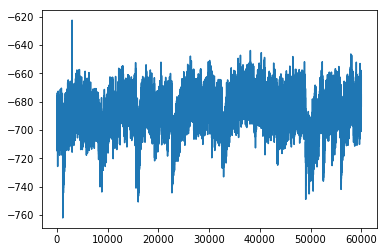

In [32]:
plt.plot(channel1[3][40000:])

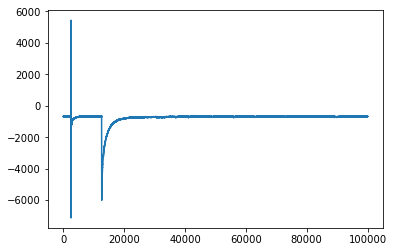

In [33]:
plt.plot(channel1[3])

In [ ]:
basicmodel = pymc3.Model()

with basicmodel:
    
    #Priors
    rise = pymc3.Normal('rise', mu=0.3, sd=0.15)
    decay = pymc3.Normal('decay', mu=35.0, sd=15.0)
    amp = pymc3.Normal('amp', mu=-25.0, sd=-5.0)